In [1]:
import os
import random
from glob import glob

import cv2
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
ori_img_paths = glob('carvana_image_masking_dataset/train/*.jpg')
ori_img_paths = sorted(ori_img_paths)
len(ori_img_paths)

5088

In [3]:
mask_paths = glob('carvana_image_masking_dataset/train_masks/*.gif')
mask_paths = sorted(mask_paths)
len(mask_paths)

5088

In [4]:
rand_idx = random.randint(0, len(ori_img_paths))
ori_img_path, mask_path = ori_img_paths[rand_idx], mask_paths[rand_idx]

ori_img = Image.open(ori_img_path).convert('RGB')
mask = Image.open(mask_path).convert('L')

np.array(ori_img).shape, np.array(mask).shape

((1280, 1918, 3), (1280, 1918))

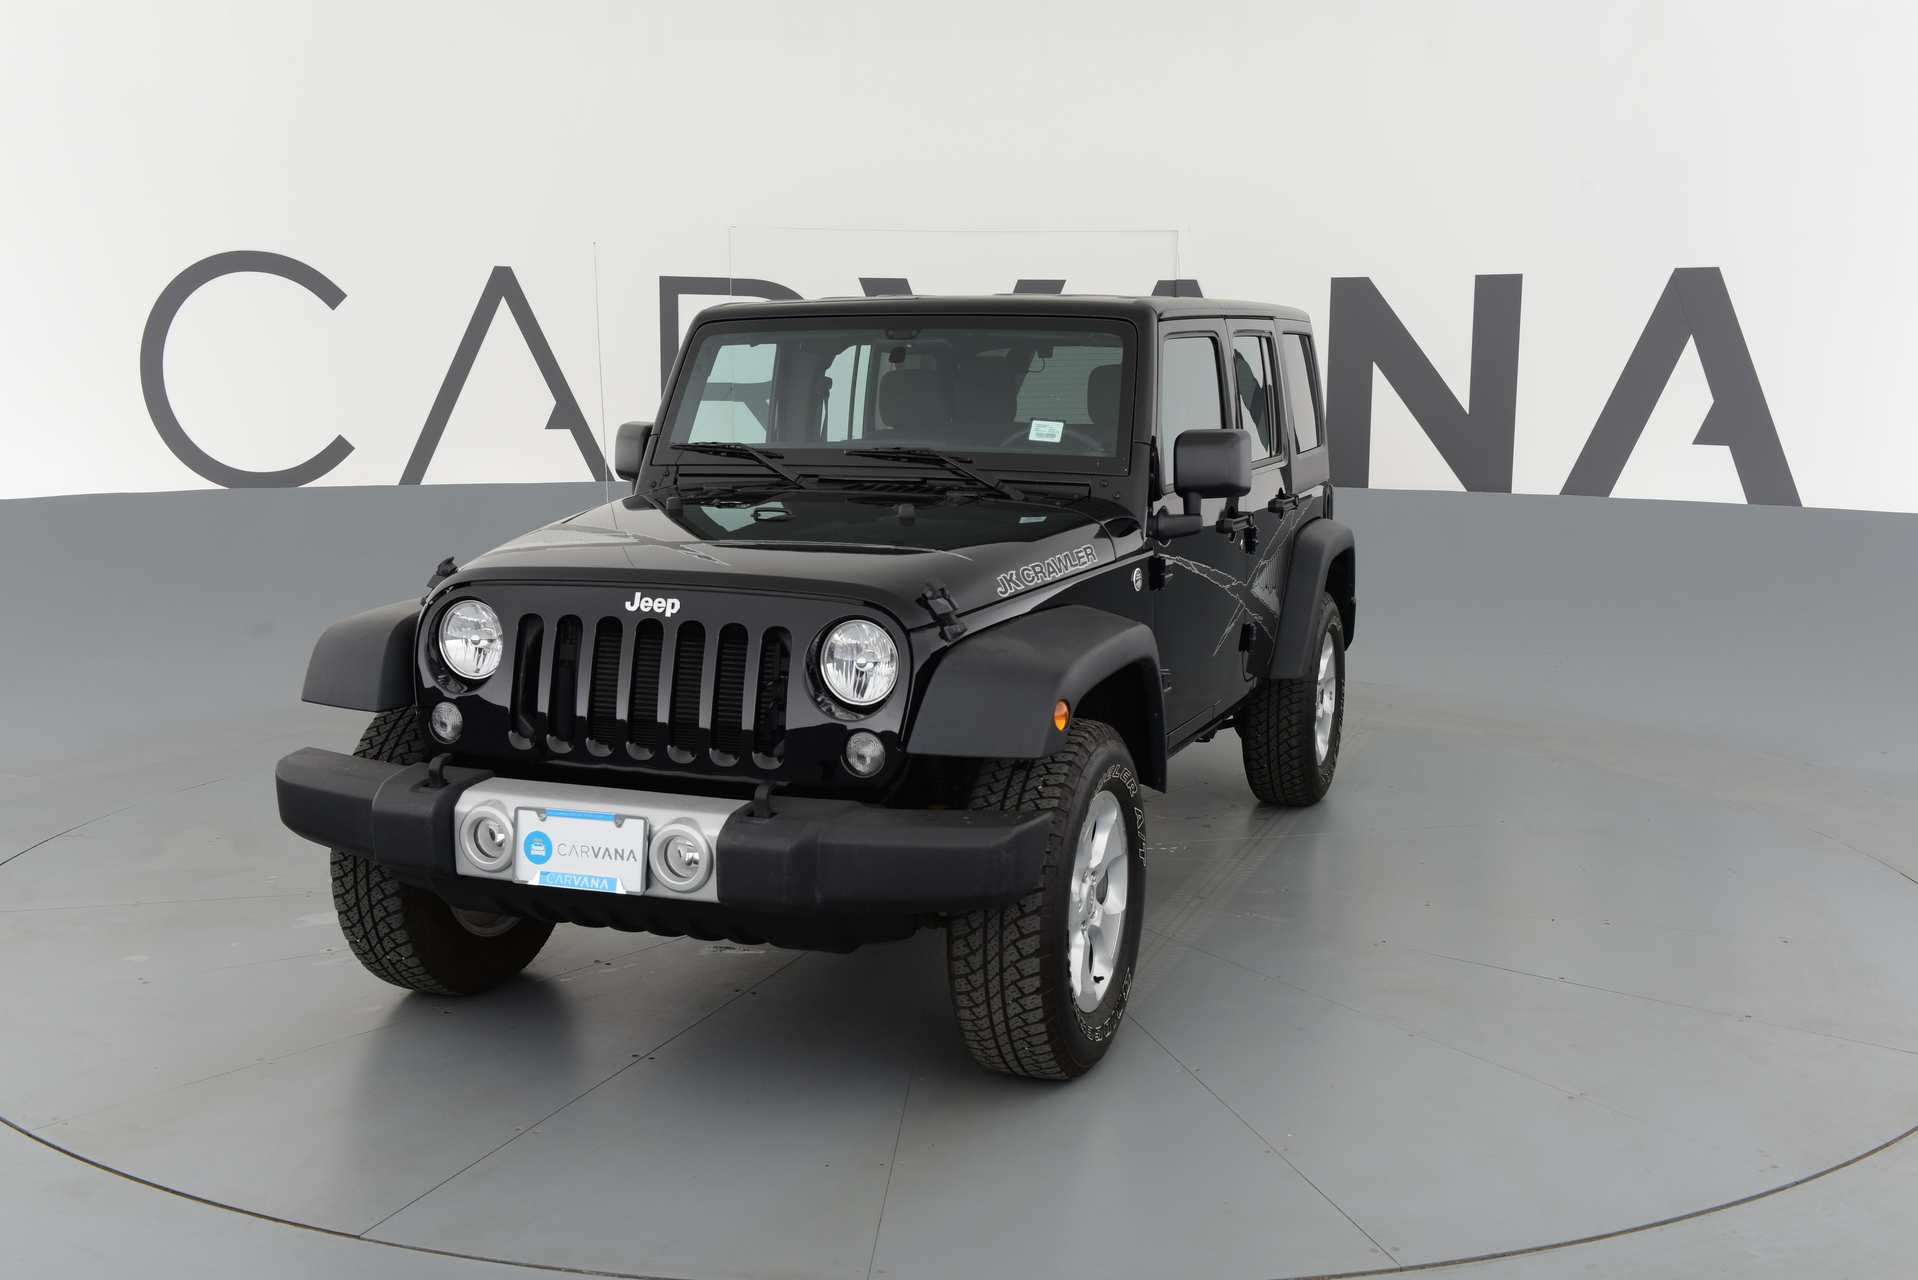

In [5]:
ori_img

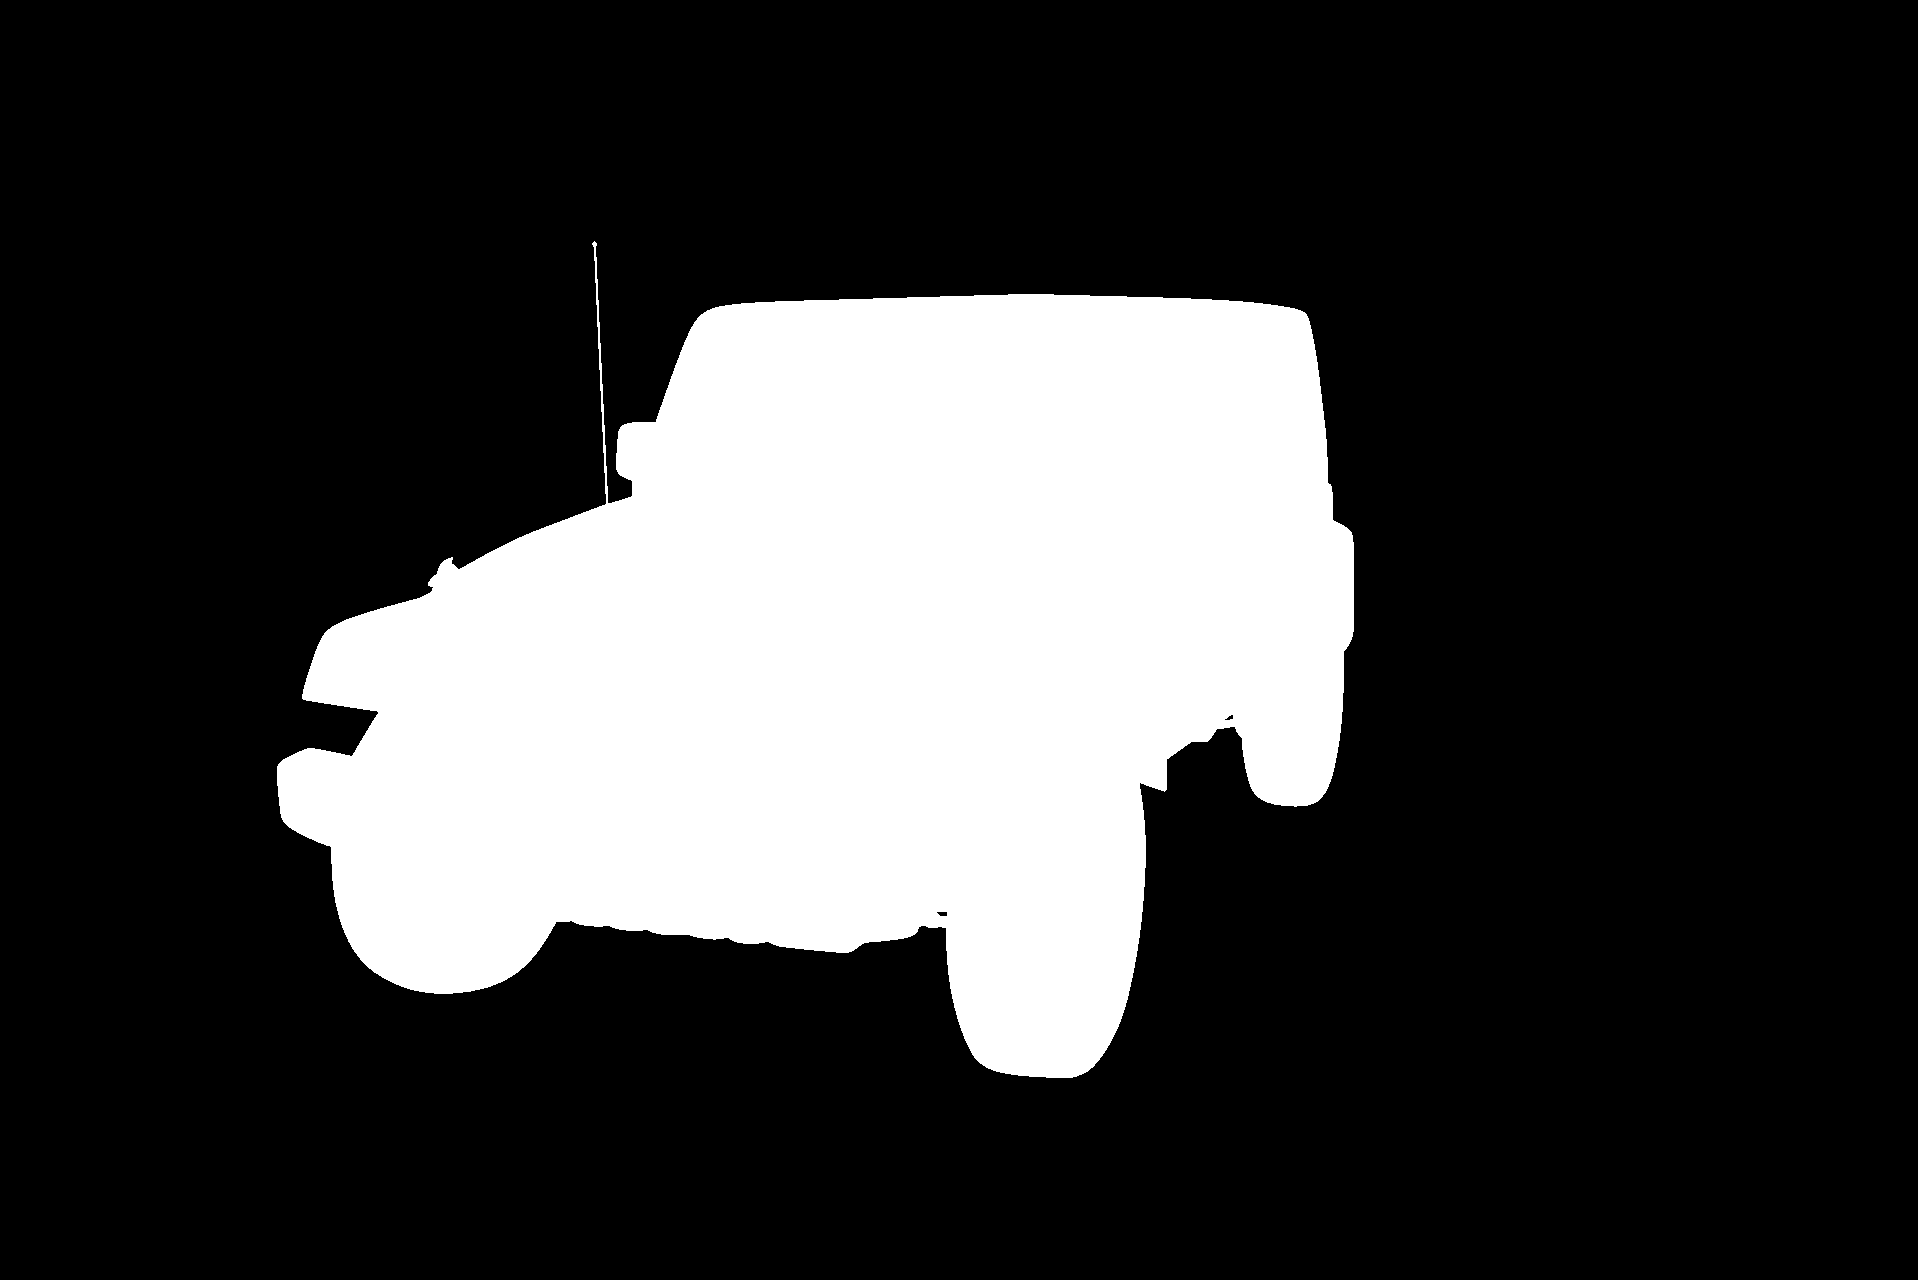

In [6]:
mask

In [7]:
np.array(mask).shape

(1280, 1918)

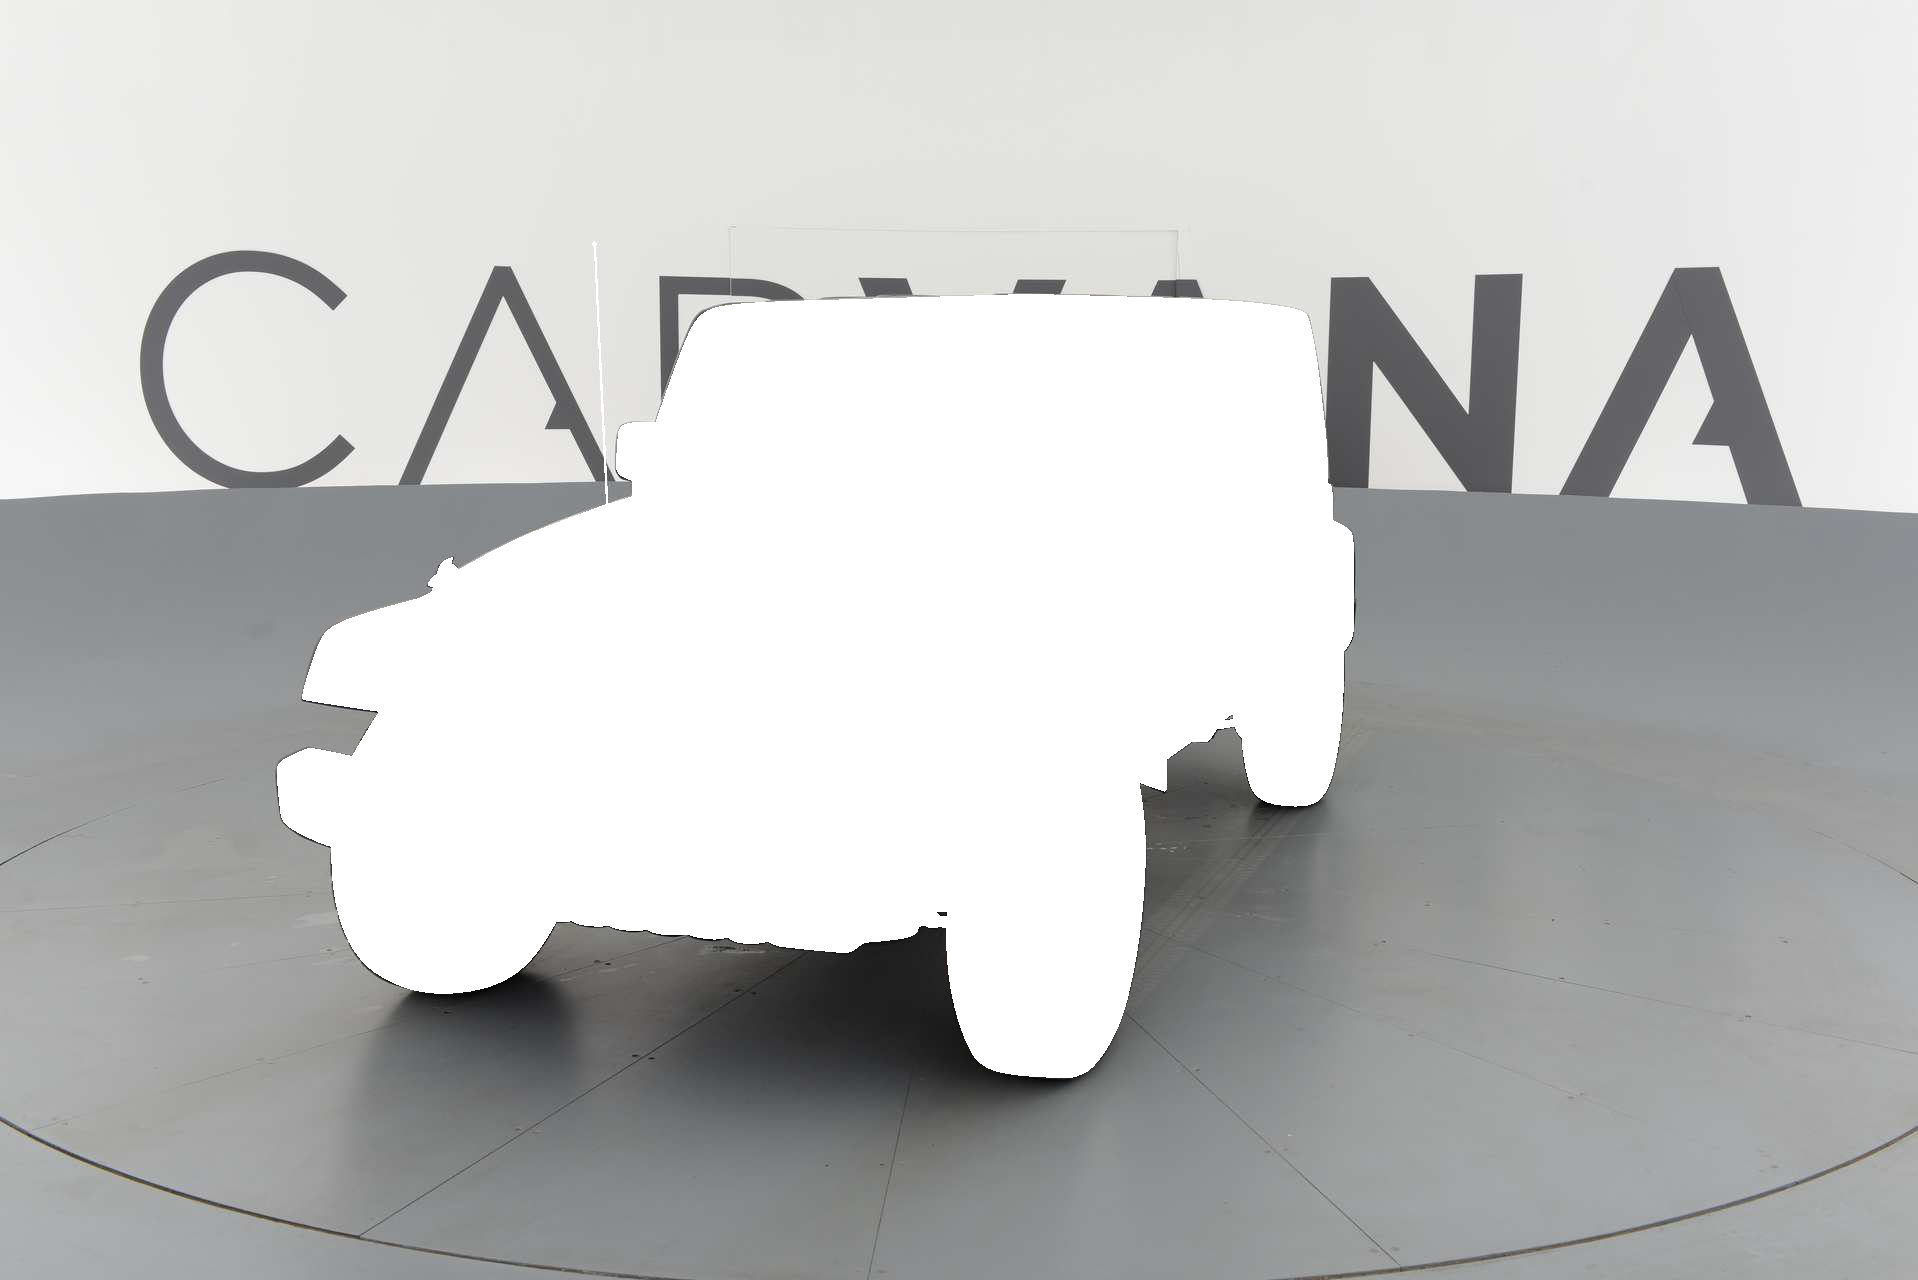

In [8]:
Image.composite(mask, ori_img, mask)

In [9]:
# Run-length encoding (RLE)
df = pd.read_csv('carvana_image_masking_dataset/train_masks.csv')
df

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...
...,...,...
5083,fff9b3a5373f_12.jpg,386005 13 387915 27 389829 34 391744 38 393660...
5084,fff9b3a5373f_13.jpg,393674 6 395585 19 397498 26 399412 32 401327 ...
5085,fff9b3a5373f_14.jpg,401397 9 403309 19 405223 26 405389 145 407138...
5086,fff9b3a5373f_15.jpg,407257 6 407393 89 409171 12 409263 179 411086...


In [10]:
rand_idx = random.randint(0, len(ori_img_paths))
img_df = df.iloc[rand_idx]
img_name, rle_mask = img_df.img, img_df.rle_mask
img_name, rle_mask

('f3b482e091c0_08.jpg',
 '482587 2 484505 2 486423 2 488340 3 490258 3 492176 3 494094 3 496012 3 497929 4 499847 3 501765 3 503683 3 505601 3 507518 4 509436 3 511354 3 513272 3 515190 3 517107 4 519025 3 520943 3 522861 3 524779 3 526696 4 528614 3 530532 3 532450 3 534368 3 536286 3 538203 3 540121 3 542039 3 543957 3 545875 3 547792 3 549710 3 551628 3 553546 3 555464 3 557381 4 559299 3 561217 3 563135 3 565053 3 566971 3 568888 4 570806 3 572724 3 574642 3 576560 3 578477 4 580395 4 582313 4 584231 3 586149 3 588066 4 589984 4 591902 4 593820 4 595737 5 597655 4 599573 4 601491 4 603409 4 605326 5 607244 5 609162 5 611080 4 612998 4 614915 5 616833 5 618751 5 620436 29 620669 5 622339 53 622587 5 624245 69 624504 6 626153 83 626422 5 628061 96 628340 5 629971 106 630258 5 631881 116 632176 5 633791 125 634093 6 635701 134 636009 8 636090 47 637611 144 637924 11 637986 78 639523 151 639840 14 639889 99 641434 159 641756 16 641792 118 643345 167 643672 19 643698 134 645257 88 64536

In [11]:
ROOT = 'carvana_image_masking_dataset/train/'

In [12]:
def rle_decode(img_name, rle_mask_str):
    s = rle_mask_str.split()
    starts = np.array(s[0:][::2], dtype=int) - 1
    lengths = np.array(s[1:][::2], dtype=int)
    ends = starts + lengths

    img = cv2.imread(os.path.join(ROOT, img_name))
    mask = np.zeros(img.shape[0] * img.shape[1], dtype=np.uint8)

    for lo, hi in zip(starts, ends):
        mask[lo:hi] = 1
    return img, np.reshape(mask, (img.shape[0], img.shape[1]))

In [13]:
img, mask = rle_decode(img_name, rle_mask)
img.shape, mask.shape

((1280, 1918, 3), (1280, 1918))

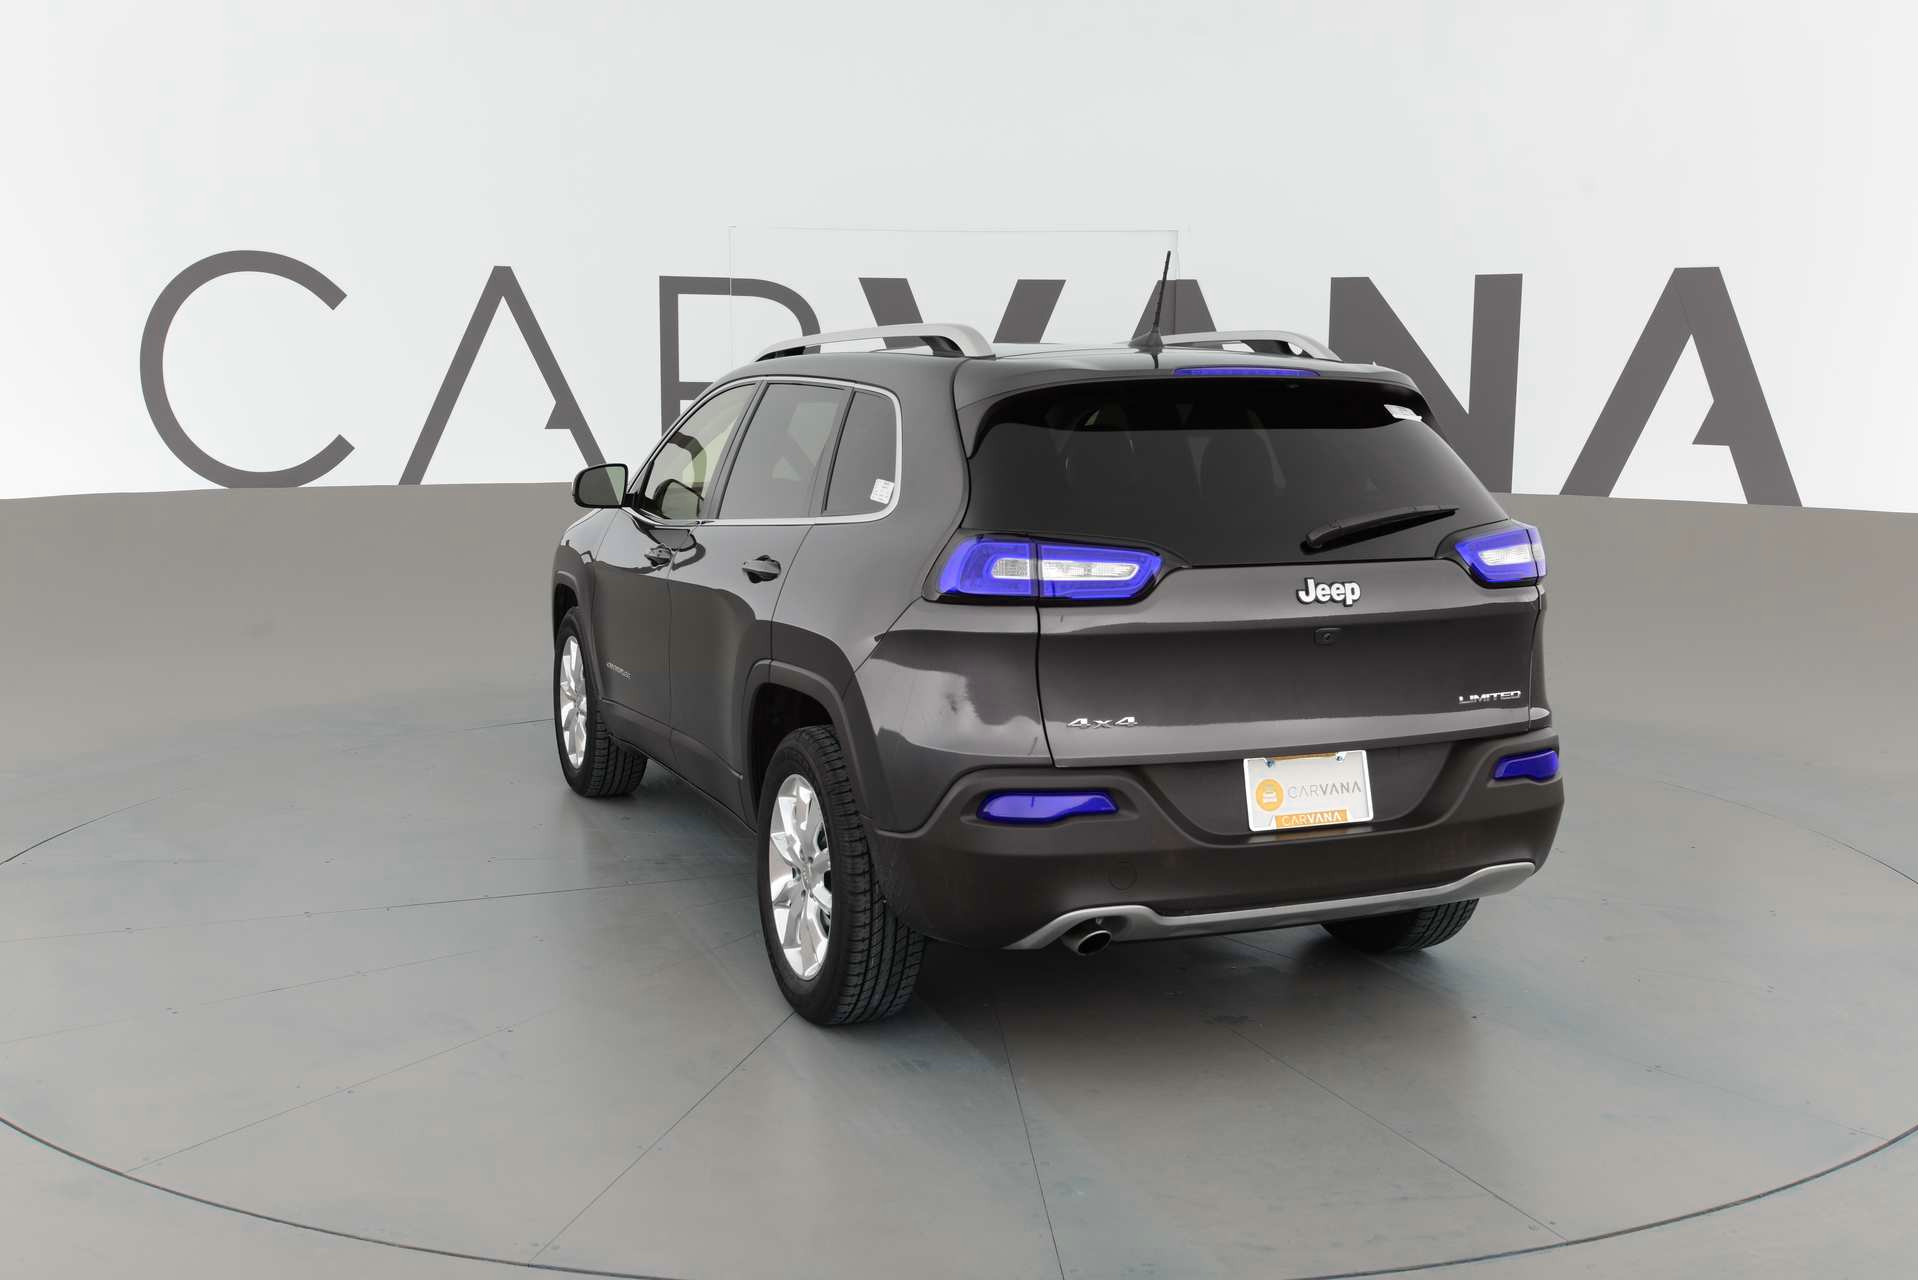

In [14]:
Image.fromarray(img)

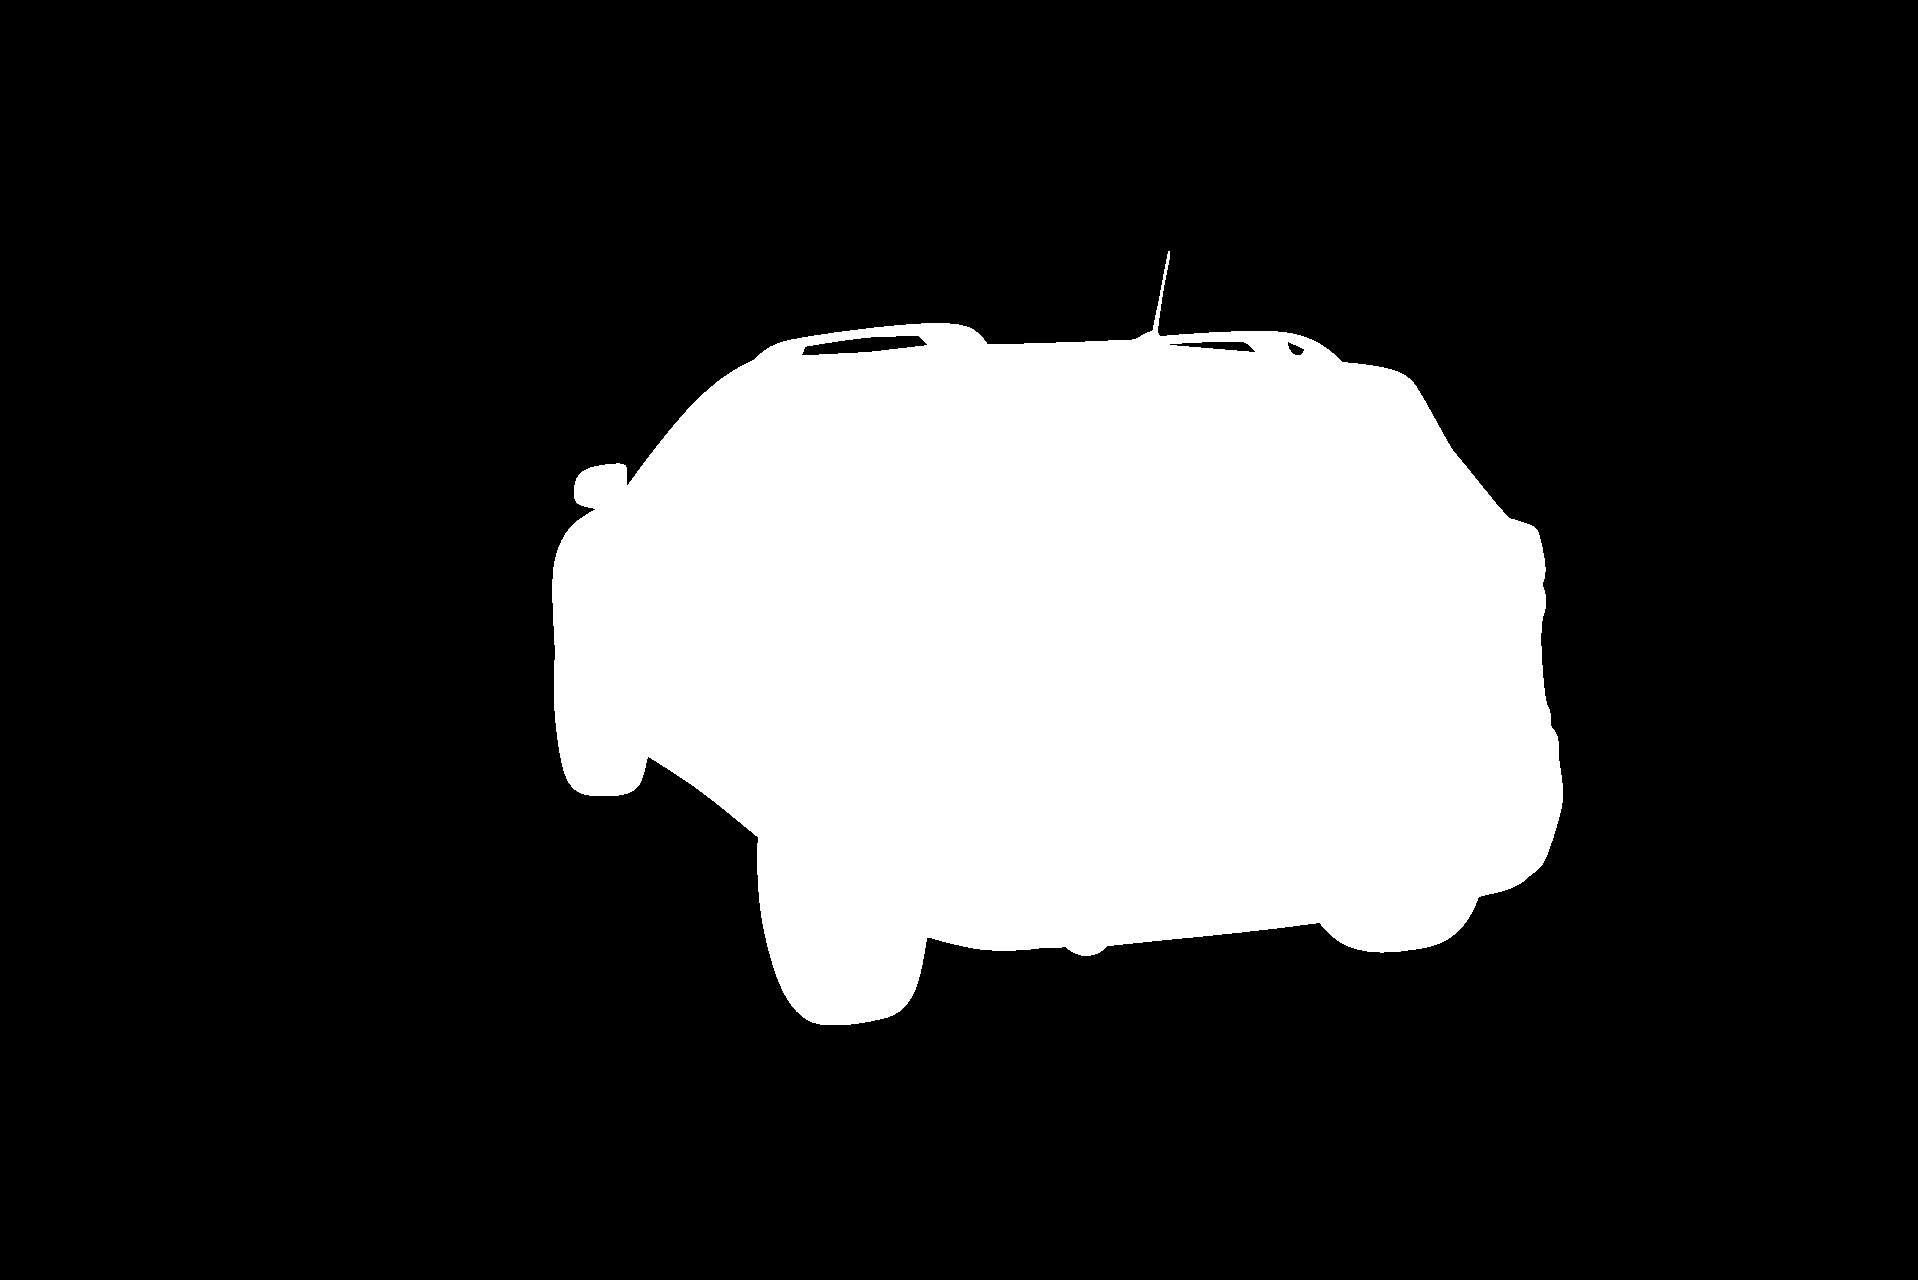

In [15]:
Image.fromarray(mask * 255)